# Problem Statement

# Import Libraries

In [265]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.impute import KNNImputer
import scipy.stats as sts
import statsmodels.api as sm
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.model_selection import train_test_split, GridSearchCV
from scipy.stats import zscore

from sklearn.ensemble import RandomForestClassifier
import pickle
import json

import warnings
warnings.filterwarnings('ignore')

In [266]:
df = pd.read_csv('bigmart_train.csv')
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [267]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Type                  8523 non-null   object 
 4   Item_MRP                   8523 non-null   float64
 5   Outlet_Identifier          8523 non-null   object 
 6   Outlet_Establishment_Year  8523 non-null   int64  
 7   Outlet_Size                6113 non-null   object 
 8   Outlet_Location_Type       8523 non-null   object 
 9   Outlet_Type                8523 non-null   object 
 10  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(3), int64(1), object(7)
memory usage: 732.6+ KB


In [268]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [269]:
df['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [270]:
Outlet_Size = df['Outlet_Size'].replace({'Small': 0,'Medium': 1,'High': 2},inplace = True)
Outlet_Size

In [271]:
df.describe()

,Item_Weight,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,6113.000000,8523.000000
mean,13.153396,140.992782,1997.831867,0.761819,2181.288914
std,9.241493,62.275067,8.371760,0.697463,1706.499616
min,4.555000,31.290000,1985.000000,0.000000,33.290000
25%,8.775000,93.826500,1987.000000,0.000000,834.247400
50%,12.600000,143.012800,1999.000000,1.000000,1794.331000
75%,16.850000,185.643700,2004.000000,1.000000,3101.296400
max,500.925000,266.888400,2009.000000,2.000000,13086.964800


In [272]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,Dairy,249.8092,OUT049,1999,1.0,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,Soft Drinks,48.2692,OUT018,2009,1.0,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,Meat,141.6180,OUT049,1999,1.0,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,Household,53.8614,OUT013,1987,2.0,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,Snack Foods,214.5218,OUT013,1987,2.0,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,Health and Hygiene,85.1224,OUT035,2004,0.0,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,Snack Foods,103.1332,OUT018,2009,1.0,Tier 3,Supermarket Type2,1845.5976


<AxesSubplot:xlabel='Item_Weight'>

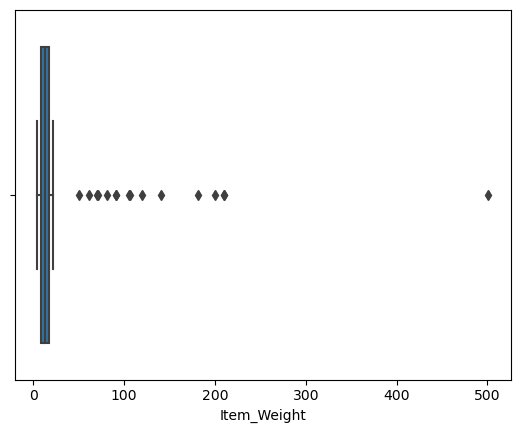

In [273]:
sns.boxplot(df['Item_Weight'])

In [274]:
q1 = df['Item_Weight'].quantile(0.25)
q2 = df['Item_Weight'].quantile(0.50)
q3 = df['Item_Weight'].quantile(0.75)
median =  df['Item_Weight'].median()
print("Q1 :",q1)
print("Q2 :",q2)
print("Q3 :",q3)
print("median :",median)

iqr = q3 - q1

upper_tail = q3 + 1.5*iqr
lower_tail = q1 - 1.5*iqr
print("Upper Tail :",upper_tail)
print("Lower Tail :",lower_tail)s

Q1 : 8.775
Q2 : 12.6
Q3 : 16.85
median : 12.6
Upper Tail : 28.962500000000002
Lower Tail : -3.3375000000000004


<AxesSubplot:xlabel='Item_MRP'>

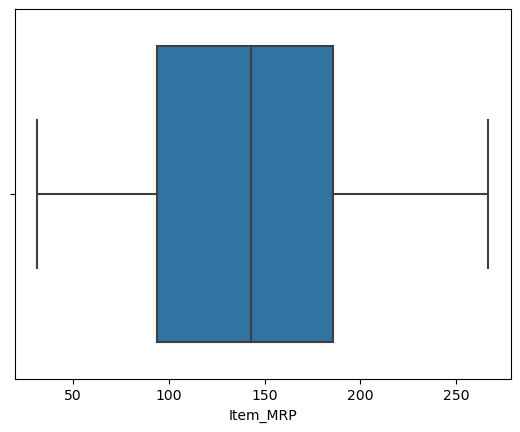

In [261]:
sns.boxplot(df['Item_MRP'])

<AxesSubplot:xlabel='Outlet_Establishment_Year'>

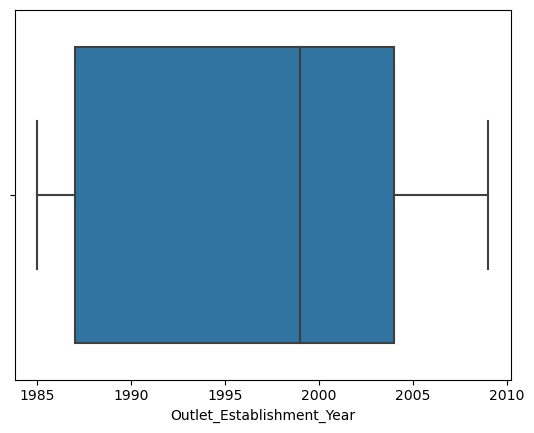

In [199]:
sns.boxplot(df['Outlet_Establishment_Year'])

<AxesSubplot:xlabel='Outlet_Size'>

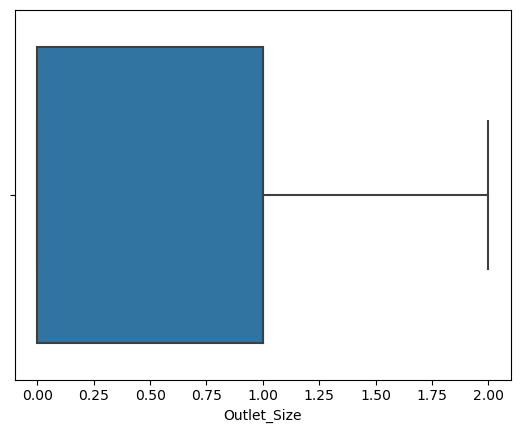

In [200]:
sns.boxplot(df['Outlet_Size'])

In [201]:
df['Item_Weight'].fillna(df['Item_Weight'].mean(),inplace = True)

In [202]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [203]:
df['Item_Identifier'].value_counts()

FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64

In [204]:
df.drop('Item_Identifier',axis = 1,inplace = True)
df

,Item_Weight,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300,Low Fat,Dairy,249.8092,OUT049,1999,1.0,Tier 1,Supermarket Type1,3735.1380
1,5.920,Regular,Soft Drinks,48.2692,OUT018,2009,1.0,Tier 3,Supermarket Type2,443.4228
2,17.500,Low Fat,Meat,141.6180,OUT049,1999,1.0,Tier 1,Supermarket Type1,2097.2700
3,19.200,Regular,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,8.930,Low Fat,Household,53.8614,OUT013,1987,2.0,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...
8518,6.865,Low Fat,Snack Foods,214.5218,OUT013,1987,2.0,Tier 3,Supermarket Type1,2778.3834
8519,8.380,Regular,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,10.600,Low Fat,Health and Hygiene,85.1224,OUT035,2004,0.0,Tier 2,Supermarket Type1,1193.1136
8521,7.210,Regular,Snack Foods,103.1332,OUT018,2009,1.0,Tier 3,Supermarket Type2,1845.5976


In [205]:
df['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [206]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'Low Fat' : 0,'Regular' : 1,'low fat' : 0, 'LF' : 0, 'reg' : 1})
df

,Item_Weight,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300,0,Dairy,249.8092,OUT049,1999,1.0,Tier 1,Supermarket Type1,3735.1380
1,5.920,1,Soft Drinks,48.2692,OUT018,2009,1.0,Tier 3,Supermarket Type2,443.4228
2,17.500,0,Meat,141.6180,OUT049,1999,1.0,Tier 1,Supermarket Type1,2097.2700
3,19.200,1,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,8.930,0,Household,53.8614,OUT013,1987,2.0,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0,Snack Foods,214.5218,OUT013,1987,2.0,Tier 3,Supermarket Type1,2778.3834
8519,8.380,1,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,10.600,0,Health and Hygiene,85.1224,OUT035,2004,0.0,Tier 2,Supermarket Type1,1193.1136
8521,7.210,1,Snack Foods,103.1332,OUT018,2009,1.0,Tier 3,Supermarket Type2,1845.5976


In [207]:
df['Item_Fat_Content'].unique()

array([0, 1], dtype=int64)

In [208]:
df['Item_Fat_Content'].value_counts()

0    5517
1    3006
Name: Item_Fat_Content, dtype: int64

In [209]:
df['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [210]:
df = pd.get_dummies(df,columns=['Item_Type'])
df

,Item_Weight,Item_Fat_Content,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_Baking Goods,...,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods
0,9.300,0,249.8092,OUT049,1999,1.0,Tier 1,Supermarket Type1,3735.1380,0,...,0,0,0,0,0,0,0,0,0,0
1,5.920,1,48.2692,OUT018,2009,1.0,Tier 3,Supermarket Type2,443.4228,0,...,0,0,0,0,0,0,0,0,1,0
2,17.500,0,141.6180,OUT049,1999,1.0,Tier 1,Supermarket Type1,2097.2700,0,...,0,0,0,0,1,0,0,0,0,0
3,19.200,1,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,0,...,1,0,0,0,0,0,0,0,0,0
4,8.930,0,53.8614,OUT013,1987,2.0,Tier 3,Supermarket Type1,994.7052,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0,214.5218,OUT013,1987,2.0,Tier 3,Supermarket Type1,2778.3834,0,...,0,0,0,0,0,0,0,1,0,0
8519,8.380,1,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850,1,...,0,0,0,0,0,0,0,0,0,0
8520,10.600,0,85.1224,OUT035,2004,0.0,Tier 2,Supermarket Type1,1193.1136,0,...,0,0,1,0,0,0,0,0,0,0
8521,7.210,1,103.1332,OUT018,2009,1.0,Tier 3,Supermarket Type2,1845.5976,0,...,0,0,0,0,0,0,0,1,0,0


In [211]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 25 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Item_Weight                      8523 non-null   float64
 1   Item_Fat_Content                 8523 non-null   int64  
 2   Item_MRP                         8523 non-null   float64
 3   Outlet_Identifier                8523 non-null   object 
 4   Outlet_Establishment_Year        8523 non-null   int64  
 5   Outlet_Size                      6113 non-null   float64
 6   Outlet_Location_Type             8523 non-null   object 
 7   Outlet_Type                      8523 non-null   object 
 8   Item_Outlet_Sales                8523 non-null   float64
 9   Item_Type_Baking Goods           8523 non-null   uint8  
 10  Item_Type_Breads                 8523 non-null   uint8  
 11  Item_Type_Breakfast              8523 non-null   uint8  
 12  Item_Type_Canned    

In [212]:
df['Outlet_Identifier'].unique()

array(['OUT049', 'OUT018', 'OUT010', 'OUT013', 'OUT027', 'OUT045',
       'OUT017', 'OUT046', 'OUT035', 'OUT019'], dtype=object)

In [213]:
df = pd.get_dummies(df,columns=['Outlet_Identifier'])
df

,Item_Weight,Item_Fat_Content,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_Baking Goods,Item_Type_Breads,...,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049
0,9.300,0,249.8092,1999,1.0,Tier 1,Supermarket Type1,3735.1380,0,0,...,0,0,0,0,0,0,0,0,0,1
1,5.920,1,48.2692,2009,1.0,Tier 3,Supermarket Type2,443.4228,0,0,...,0,0,0,1,0,0,0,0,0,0
2,17.500,0,141.6180,1999,1.0,Tier 1,Supermarket Type1,2097.2700,0,0,...,0,0,0,0,0,0,0,0,0,1
3,19.200,1,182.0950,1998,NaN,Tier 3,Grocery Store,732.3800,0,0,...,1,0,0,0,0,0,0,0,0,0
4,8.930,0,53.8614,1987,2.0,Tier 3,Supermarket Type1,994.7052,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0,214.5218,1987,2.0,Tier 3,Supermarket Type1,2778.3834,0,0,...,0,1,0,0,0,0,0,0,0,0
8519,8.380,1,108.1570,2002,NaN,Tier 2,Supermarket Type1,549.2850,1,0,...,0,0,0,0,0,0,0,1,0,0
8520,10.600,0,85.1224,2004,0.0,Tier 2,Supermarket Type1,1193.1136,0,0,...,0,0,0,0,0,0,1,0,0,0
8521,7.210,1,103.1332,2009,1.0,Tier 3,Supermarket Type2,1845.5976,0,0,...,0,0,0,1,0,0,0,0,0,0


In [214]:
df['Outlet_Establishment_Year'].unique()

array([1999, 2009, 1998, 1987, 1985, 2002, 2007, 1997, 2004], dtype=int64)

In [215]:
df = pd.get_dummies(df,columns=['Outlet_Establishment_Year'])
df

,Item_Weight,Item_Fat_Content,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,...,Outlet_Identifier_OUT049,Outlet_Establishment_Year_1985,Outlet_Establishment_Year_1987,Outlet_Establishment_Year_1997,Outlet_Establishment_Year_1998,Outlet_Establishment_Year_1999,Outlet_Establishment_Year_2002,Outlet_Establishment_Year_2004,Outlet_Establishment_Year_2007,Outlet_Establishment_Year_2009
0,9.300,0,249.8092,1.0,Tier 1,Supermarket Type1,3735.1380,0,0,0,...,1,0,0,0,0,1,0,0,0,0
1,5.920,1,48.2692,1.0,Tier 3,Supermarket Type2,443.4228,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,17.500,0,141.6180,1.0,Tier 1,Supermarket Type1,2097.2700,0,0,0,...,1,0,0,0,0,1,0,0,0,0
3,19.200,1,182.0950,NaN,Tier 3,Grocery Store,732.3800,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,8.930,0,53.8614,2.0,Tier 3,Supermarket Type1,994.7052,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0,214.5218,2.0,Tier 3,Supermarket Type1,2778.3834,0,0,0,...,0,0,1,0,0,0,0,0,0,0
8519,8.380,1,108.1570,NaN,Tier 2,Supermarket Type1,549.2850,1,0,0,...,0,0,0,0,0,0,1,0,0,0
8520,10.600,0,85.1224,0.0,Tier 2,Supermarket Type1,1193.1136,0,0,0,...,0,0,0,0,0,0,0,1,0,0
8521,7.210,1,103.1332,1.0,Tier 3,Supermarket Type2,1845.5976,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [216]:
df['Outlet_Location_Type'].unique()

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

In [217]:
df['Outlet_Location_Type'].replace({'Tier 1' : 1, 'Tier 3' : 3, 'Tier 2' : 2},inplace = True)
df

,Item_Weight,Item_Fat_Content,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,...,Outlet_Identifier_OUT049,Outlet_Establishment_Year_1985,Outlet_Establishment_Year_1987,Outlet_Establishment_Year_1997,Outlet_Establishment_Year_1998,Outlet_Establishment_Year_1999,Outlet_Establishment_Year_2002,Outlet_Establishment_Year_2004,Outlet_Establishment_Year_2007,Outlet_Establishment_Year_2009
0,9.300,0,249.8092,1.0,1,Supermarket Type1,3735.1380,0,0,0,...,1,0,0,0,0,1,0,0,0,0
1,5.920,1,48.2692,1.0,3,Supermarket Type2,443.4228,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,17.500,0,141.6180,1.0,1,Supermarket Type1,2097.2700,0,0,0,...,1,0,0,0,0,1,0,0,0,0
3,19.200,1,182.0950,NaN,3,Grocery Store,732.3800,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,8.930,0,53.8614,2.0,3,Supermarket Type1,994.7052,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0,214.5218,2.0,3,Supermarket Type1,2778.3834,0,0,0,...,0,0,1,0,0,0,0,0,0,0
8519,8.380,1,108.1570,NaN,2,Supermarket Type1,549.2850,1,0,0,...,0,0,0,0,0,0,1,0,0,0
8520,10.600,0,85.1224,0.0,2,Supermarket Type1,1193.1136,0,0,0,...,0,0,0,0,0,0,0,1,0,0
8521,7.210,1,103.1332,1.0,3,Supermarket Type2,1845.5976,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [218]:
df['Outlet_Type'].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [219]:
df['Outlet_Type'].replace({'Supermarket Type1' : 1, 'Supermarket Type2' : 2, 'Grocery Store' : 0, 'Supermarket Type3' : 3},inplace = True)
df

,Item_Weight,Item_Fat_Content,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,...,Outlet_Identifier_OUT049,Outlet_Establishment_Year_1985,Outlet_Establishment_Year_1987,Outlet_Establishment_Year_1997,Outlet_Establishment_Year_1998,Outlet_Establishment_Year_1999,Outlet_Establishment_Year_2002,Outlet_Establishment_Year_2004,Outlet_Establishment_Year_2007,Outlet_Establishment_Year_2009
0,9.300,0,249.8092,1.0,1,1,3735.1380,0,0,0,...,1,0,0,0,0,1,0,0,0,0
1,5.920,1,48.2692,1.0,3,2,443.4228,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,17.500,0,141.6180,1.0,1,1,2097.2700,0,0,0,...,1,0,0,0,0,1,0,0,0,0
3,19.200,1,182.0950,NaN,3,0,732.3800,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,8.930,0,53.8614,2.0,3,1,994.7052,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0,214.5218,2.0,3,1,2778.3834,0,0,0,...,0,0,1,0,0,0,0,0,0,0
8519,8.380,1,108.1570,NaN,2,1,549.2850,1,0,0,...,0,0,0,0,0,0,1,0,0,0
8520,10.600,0,85.1224,0.0,2,1,1193.1136,0,0,0,...,0,0,0,0,0,0,0,1,0,0
8521,7.210,1,103.1332,1.0,3,2,1845.5976,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [220]:
knn_imputer = KNNImputer(n_neighbors=3)
array = knn_imputer.fit_transform(df)
df = pd.DataFrame(array,columns=df.columns)
df

,Item_Weight,Item_Fat_Content,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,...,Outlet_Identifier_OUT049,Outlet_Establishment_Year_1985,Outlet_Establishment_Year_1987,Outlet_Establishment_Year_1997,Outlet_Establishment_Year_1998,Outlet_Establishment_Year_1999,Outlet_Establishment_Year_2002,Outlet_Establishment_Year_2004,Outlet_Establishment_Year_2007,Outlet_Establishment_Year_2009
0,9.300,0.0,249.8092,1.0,1.0,1.0,3735.1380,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,5.920,1.0,48.2692,1.0,3.0,2.0,443.4228,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,17.500,0.0,141.6180,1.0,1.0,1.0,2097.2700,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,19.200,1.0,182.0950,0.0,3.0,0.0,732.3800,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,8.930,0.0,53.8614,2.0,3.0,1.0,994.7052,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0.0,214.5218,2.0,3.0,1.0,2778.3834,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8519,8.380,1.0,108.1570,1.0,2.0,1.0,549.2850,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
8520,10.600,0.0,85.1224,0.0,2.0,1.0,1193.1136,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8521,7.210,1.0,103.1332,1.0,3.0,2.0,1845.5976,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [221]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 42 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Item_Weight                      8523 non-null   float64
 1   Item_Fat_Content                 8523 non-null   float64
 2   Item_MRP                         8523 non-null   float64
 3   Outlet_Size                      8523 non-null   float64
 4   Outlet_Location_Type             8523 non-null   float64
 5   Outlet_Type                      8523 non-null   float64
 6   Item_Outlet_Sales                8523 non-null   float64
 7   Item_Type_Baking Goods           8523 non-null   float64
 8   Item_Type_Breads                 8523 non-null   float64
 9   Item_Type_Breakfast              8523 non-null   float64
 10  Item_Type_Canned                 8523 non-null   float64
 11  Item_Type_Dairy                  8523 non-null   float64
 12  Item_Type_Frozen Foo

In [222]:
df.isna().sum()

Item_Weight                        0
Item_Fat_Content                   0
Item_MRP                           0
Outlet_Size                        0
Outlet_Location_Type               0
Outlet_Type                        0
Item_Outlet_Sales                  0
Item_Type_Baking Goods             0
Item_Type_Breads                   0
Item_Type_Breakfast                0
Item_Type_Canned                   0
Item_Type_Dairy                    0
Item_Type_Frozen Foods             0
Item_Type_Fruits and Vegetables    0
Item_Type_Hard Drinks              0
Item_Type_Health and Hygiene       0
Item_Type_Household                0
Item_Type_Meat                     0
Item_Type_Others                   0
Item_Type_Seafood                  0
Item_Type_Snack Foods              0
Item_Type_Soft Drinks              0
Item_Type_Starchy Foods            0
Outlet_Identifier_OUT010           0
Outlet_Identifier_OUT013           0
Outlet_Identifier_OUT017           0
Outlet_Identifier_OUT018           0
O

<AxesSubplot:>

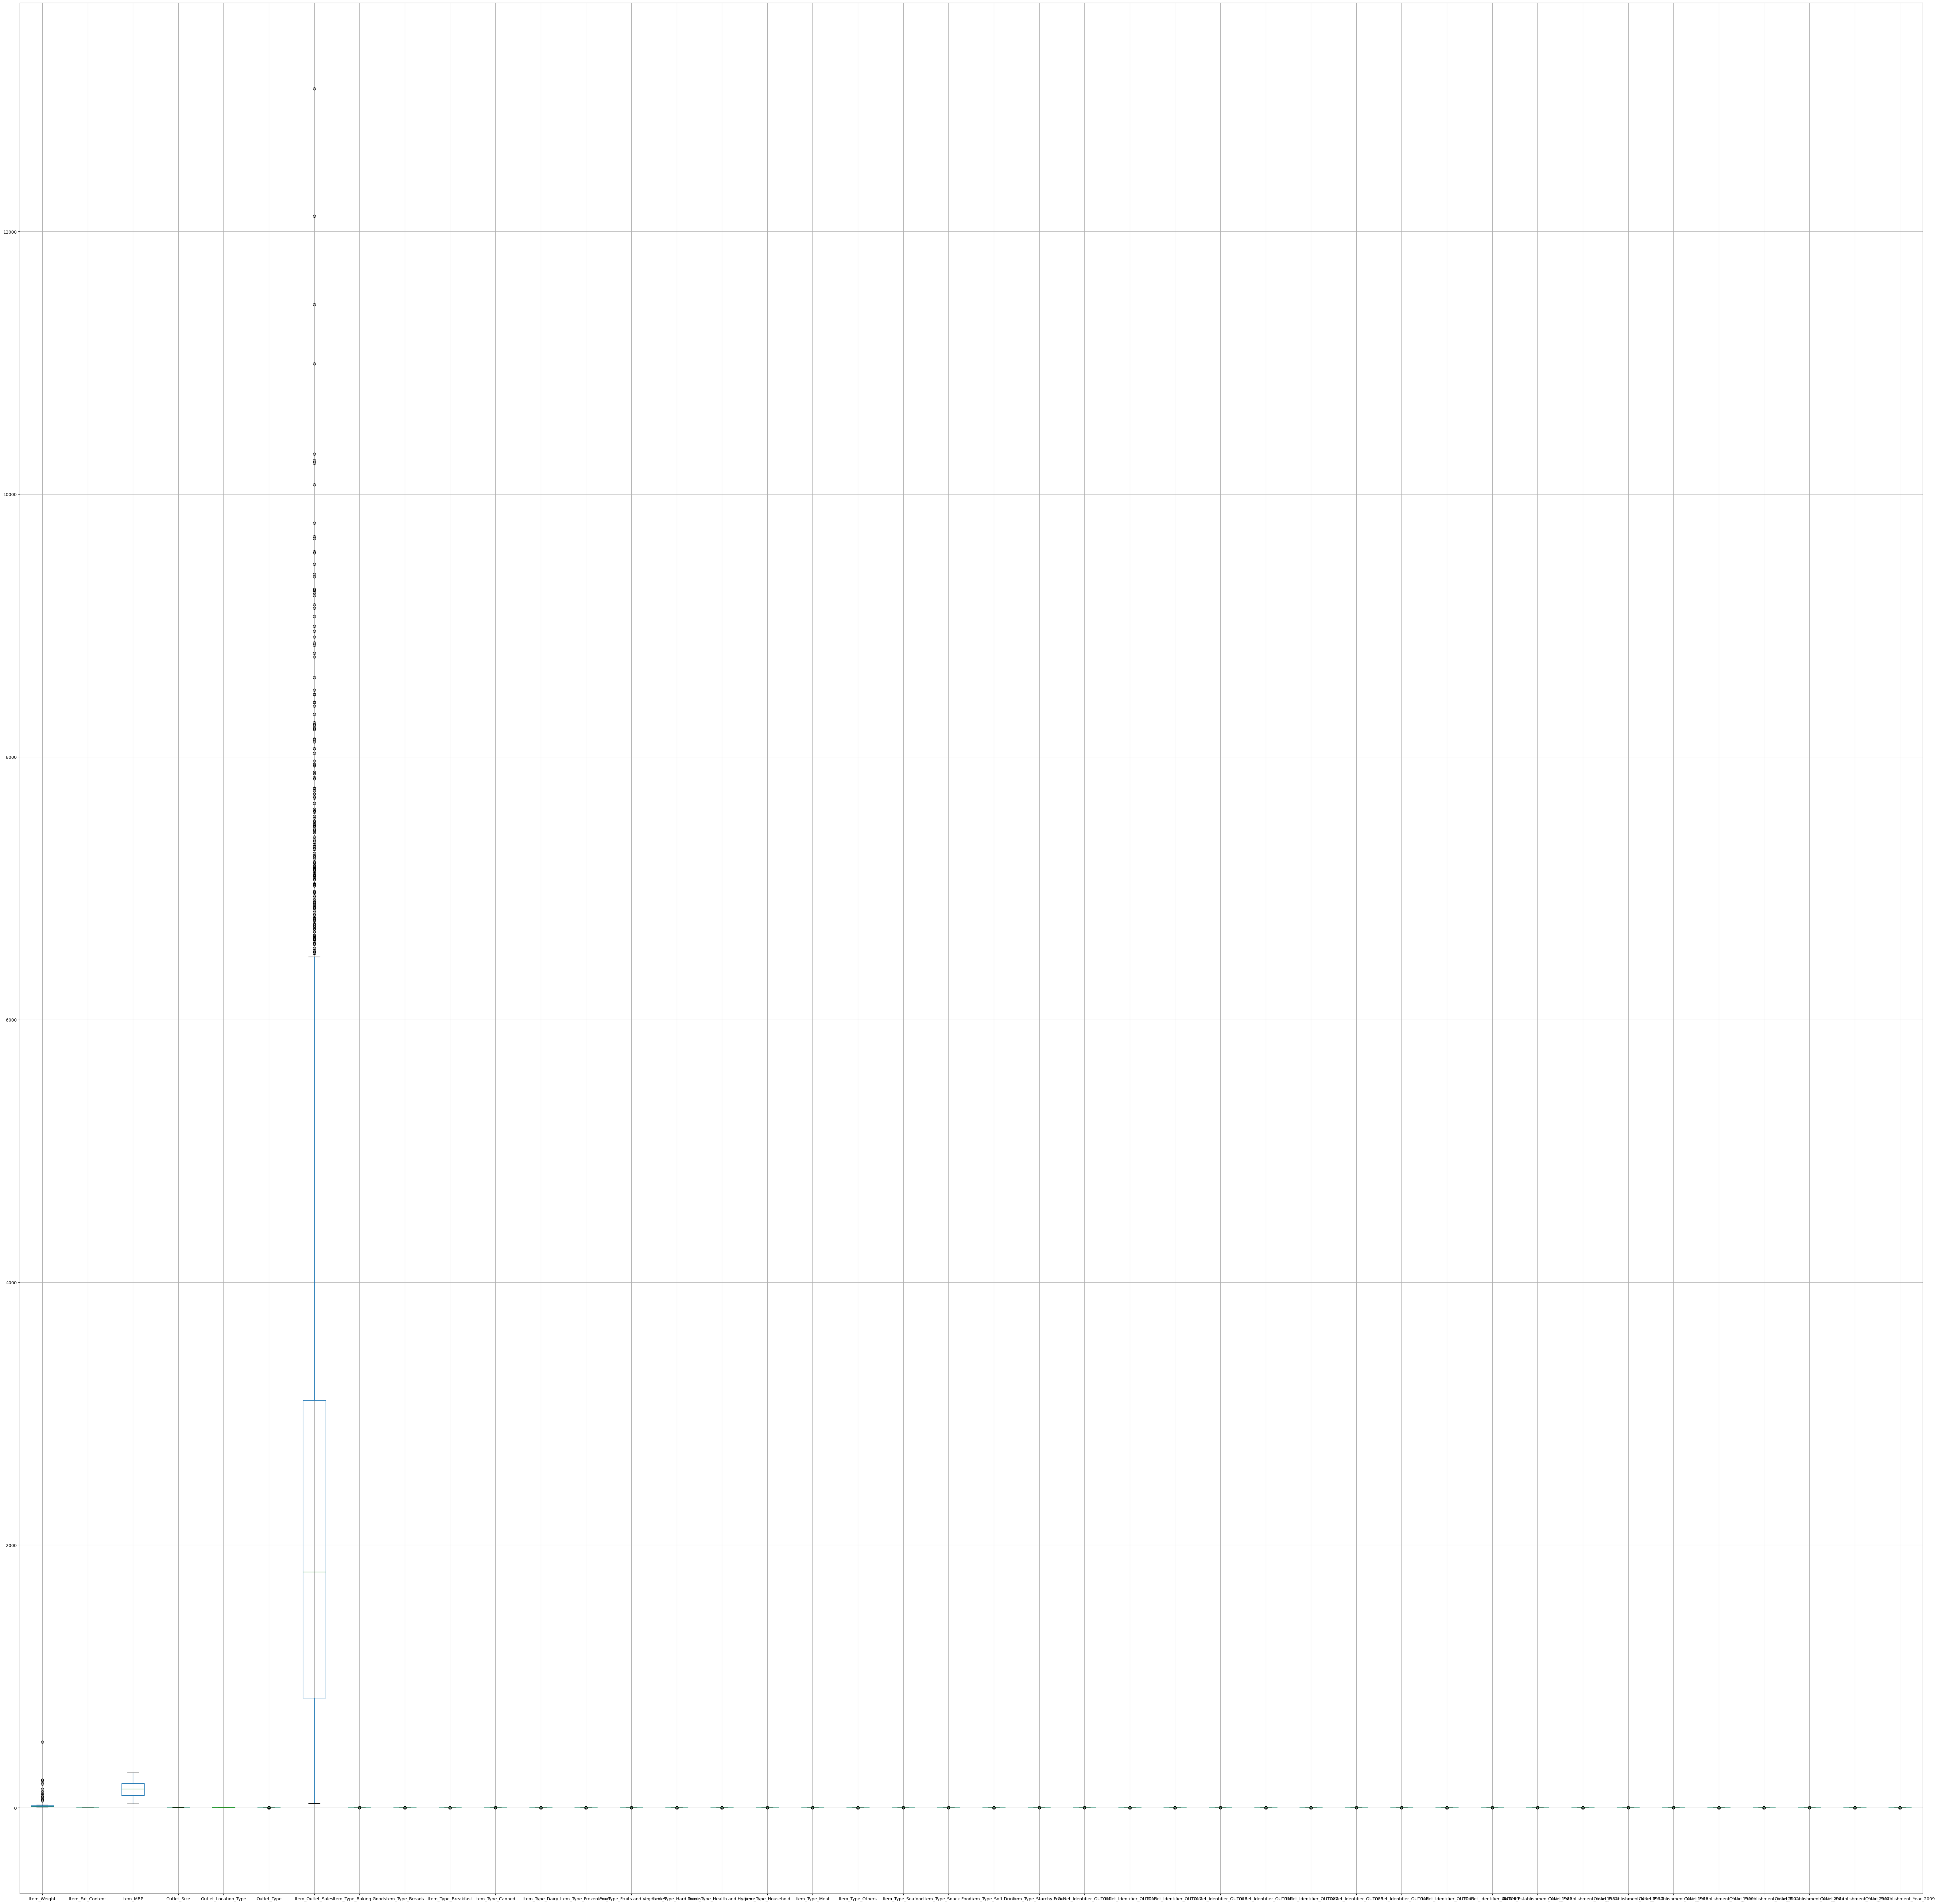

In [223]:
plt.figure(figsize = (80,80))
df.boxplot()